In [28]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline
import seaborn as sns

In [5]:
data = pd.read_csv('../../data/bikes_rent.csv')

In [6]:
data.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed(mph),windspeed(ms),cnt
0,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,4.805490,985
1,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,7.443949,801
2,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,7.437060,1349
3,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,4.800998,1562
4,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,5.597810,1600


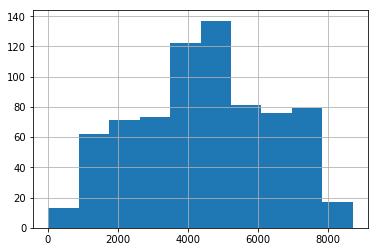

In [7]:
data['cnt'].hist();

In [10]:
X_df, y_series = data.drop('cnt', axis=1), data['cnt']

In [11]:
X_df.shape

(731, 12)

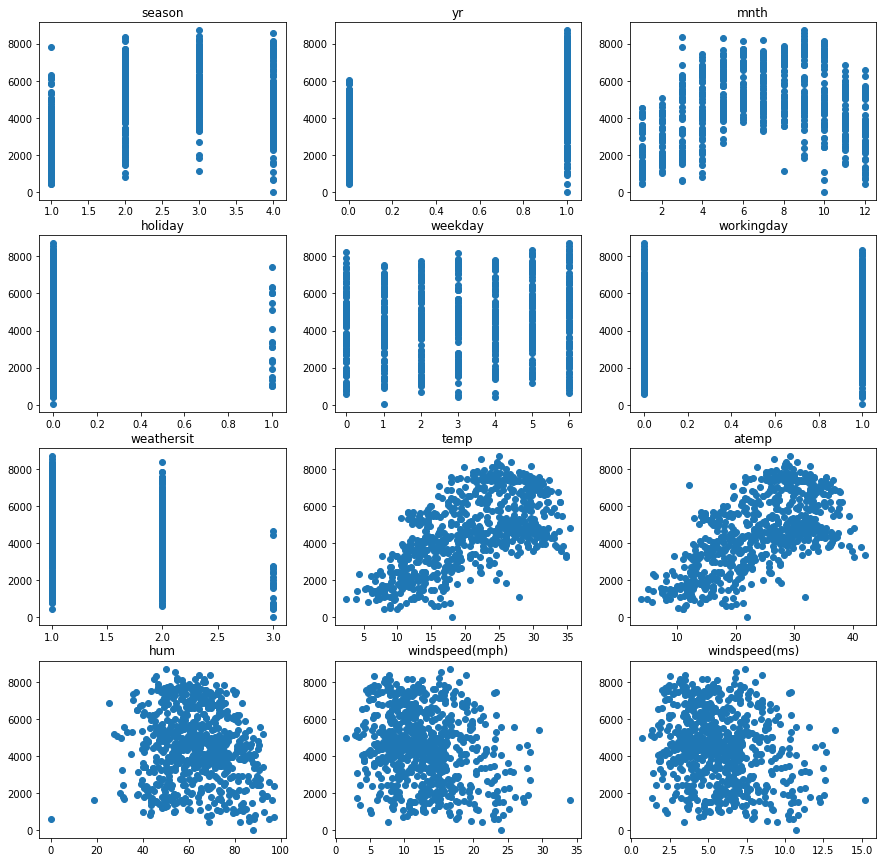

In [17]:
plt.figure(figsize=(15,15))
for i, col in enumerate(X_df.columns):
    plt.subplot(4, 3, i+1)
    plt.scatter(X_df[col], y_series)
    plt.title(col);

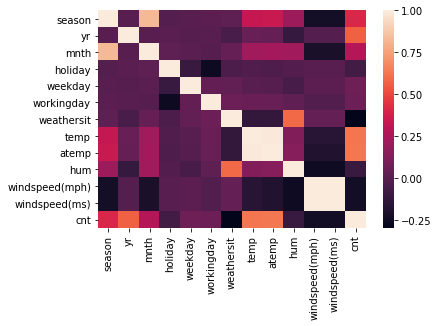

In [29]:
sns.heatmap(data.corr());

In [20]:
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, Ridge, RidgeCV

In [21]:
ols = LinearRegression(normalize=True)

In [24]:
train_share = 0.7

train_part_len = int(train_share*data.shape[0])

X_train = X_df.values[:train_part_len,:]
X_valid = X_df.values[train_part_len:,:]
y_train = y_series.values[:train_part_len]
y_valid = y_series.values[train_part_len:]

In [25]:
from sklearn.metrics import mean_squared_error

In [26]:
ols.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=True)

In [30]:
y_ols_pred = ols.predict(X_valid)

In [32]:
def rmse(y, p):
    return np.sqrt(mean_squared_error(y,p))

In [50]:
def beautiful_coef(coefs, feature_names):
    return pd.DataFrame(coefs, index=feature_names,
                       columns=['coef']).sort_values('coef', ascending=False)

In [51]:
rmse(y_valid, y_ols_pred)

1121.7963670007455

In [52]:
beautiful_coef(ols.coef_, X_df.columns)

,coef
windspeed(ms),1.299905e+12
yr,2.111925e+03
season,3.737386e+02
atemp,1.113794e+02
weekday,5.185581e+01
workingday,3.170130e+01
mnth,9.011360e+00
temp,8.535286e+00
hum,-1.043749e+01
holiday,-4.139610e+02


In [53]:
ridge = Ridge(random_state=17, normalize=True)

In [54]:
ridge.fit(X_train, y_train)

Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=True, random_state=17, solver='auto', tol=0.001)

In [55]:
beautiful_coef(ridge.coef_, X_df.columns)

,coef
yr,893.471708
season,122.291657
workingday,44.899153
temp,43.335021
atemp,40.730731
weekday,23.657447
mnth,16.580342
hum,-6.019385
windspeed(mph),-14.569916
windspeed(ms),-32.592903


In [58]:
ridge_valid_pred = ridge.predict(X_valid)

In [59]:
rmse(y_valid, ridge_valid_pred)

1694.1963161505423

In [68]:
alphas = np.logspace(-4,4,100)

In [69]:
ridge_cv = RidgeCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [70]:
ridge_cv.alpha_

0.012618568830660211

In [71]:
best_ridge_valid_pred = ridge_cv.predict(X_valid)

    rmse(y_va

In [72]:
rmse(y_valid, best_ridge_valid_pred)

1118.8033866080996

In [73]:
lasso = LassoCV(alphas=alphas, cv=5, normalize=True).fit(X_train, y_train)

In [74]:
lasso.alpha_

0.097700995729922566

In [75]:
best_lasso_valid_pred = lasso.predict(X_valid)

In [76]:
rmse(y_valid, best_lasso_valid_pred)

1120.7599048718084

In [78]:
beautiful_coef(lasso.coef_, X_df.columns)

,coef
yr,2104.016880
season,371.889534
atemp,110.702588
weekday,50.803375
workingday,28.492832
temp,9.100711
mnth,8.227825
windspeed(ms),-0.000000
hum,-10.225836
windspeed(mph),-35.387183


In [81]:
beautiful_coef(ridge_cv.coef_, X_df.columns)

,coef
yr,2086.883298
season,354.849868
atemp,70.048003
temp,52.872890
weekday,50.868024
workingday,34.406998
mnth,12.867755
hum,-10.225210
windspeed(mph),-18.579682
windspeed(ms),-41.562749


In [82]:
from sklearn.ensemble import RandomForestRegressor

In [83]:
forest = RandomForestRegressor(n_estimators=100, random_state=17)

In [84]:
forest.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=100, n_jobs=1,
           oob_score=False, random_state=17, verbose=0, warm_start=False)

In [85]:
forest_valid_pred = forest.predict(X_valid)

In [86]:
rmse(y_valid, forest_valid_pred)

1053.8080862607937

In [87]:
beautiful_coef(forest.feature_importances_, X_df.columns)

,coef
temp,0.324132
atemp,0.216861
yr,0.200795
hum,0.067893
season,0.064054
weathersit,0.032349
mnth,0.028291
windspeed(ms),0.020298
weekday,0.018796
windspeed(mph),0.017695
